# EDA Notebook
## Contents:
1.  Loading Data
2.  Investigating Data structure
3.  Checking for unique values, missing data and zeros
4.  Checking for Anomalies
5.  Statistical summary for the data
6.  Correlation
7.  Visulaizing Trends
8.  Hypothesis testing

## Importing libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

## Display options

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

# 1. Loading Data

In [6]:
df = pd.read_csv("monthly_main_category (1).csv",index_col=0)
df

date  Arts & Entertainment  Autos & Vehicles  Beauty & Fitness  \
0    2004-01-01                     7                 5                 7   
1    2004-02-01                     7                 8                 7   
2    2004-03-01                     8                 7                 8   
3    2004-04-01                     8                 9                10   
4    2004-05-01                     8                 7                 9   
5    2004-06-01                     8                 8                 9   
6    2004-07-01                    11                 8                10   
7    2004-08-01                    11                 9                10   
8    2004-09-01                    10                11                10   
9    2004-10-01                    10                 9                10   
10   2004-11-01                    10                 8                11   
11   2004-12-01                    12                10                11   
12   2005-01-01                    12                10                11   
13   2005-02-01                    12                10                13   
14   2005-03-01                    13                11                13   
15   2005-04-01                    14                11                13   
16   2005-05-01                    13                10                12   
17   2005-06-01                    14                12                16   
18   2005-07-01                    17                13                17   
19   2005-08-01                    16                14                16   
20   2005-09-01                    14                11                13   
21   2005-10-01                    13                12                12   
22   2005-11-01                    15                13                14   
23   2005-12-01                    19                14                17   
24   2006-01-01                    17                11                12   
25   2006-02-01                    18                11                15   
26   2006-03-01                    18                14                16   
27   2006-04-01                    21                14                19   
28   2006-05-01                    19                15                19   
29   2006-06-01                    22                13                18   
30   2006-07-01                    26                16                20   
31   2006-08-01                    28                17                21   
32   2006-09-01                    25                15                18   
33   2006-10-01                    23                14                18   
34   2006-11-01                    25                15                21   
35   2006-12-01                    31                16                20   
36   2007-01-01                    30                15                21   
37   2007-02-01                    33                17                22   
38   2007-03-01                    35                18                25   
39   2007-04-01                    36                19                25   
40   2007-05-01                    36                19                26   
41   2007-06-01                    40                19                29   
42   2007-07-01                    48                19                29   
43   2007-08-01                    50                19                29   
44   2007-09-01                    41                18                23   
45   2007-10-01                    40                19                24   
46   2007-11-01                    41                21                25   
47   2007-12-01                    48                22                25   
48   2008-01-01                    45                19                25   
49   2008-02-01                    43                19                25   
50   2008-03-01                    49                21                30   
51   20

# 2. Investigating data structure

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     214 non-null    object
 1   Arts & Entertainment     214 non-null    int64 
 2   Autos & Vehicles         214 non-null    int64 
 3   Beauty & Fitness         214 non-null    int64 
 4   Books & Literature       214 non-null    int64 
 5   Business & Industrial    214 non-null    int64 
 6   Computers & Electronics  214 non-null    int64 
 7   Finance                  214 non-null    int64 
 8   Food & Drink             214 non-null    int64 
 9   Games                    214 non-null    int64 
 10  Health                   214 non-null    int64 
 11  Hobbies & Leisure        214 non-null    int64 
 12  Home & Garden            214 non-null    int64 
 13  Internet & Telecom       214 non-null    int64 
 14  Jobs & Education         214 non-null    i

In [8]:
df.shape

(214, 26)

In [9]:
df.dtypes

date                       object
Arts & Entertainment        int64
Autos & Vehicles            int64
Beauty & Fitness            int64
Books & Literature          int64
Business & Industrial       int64
Computers & Electronics     int64
Finance                     int64
Food & Drink                int64
Games                       int64
Health                      int64
Hobbies & Leisure           int64
Home & Garden               int64
Internet & Telecom          int64
Jobs & Education            int64
Law & Government            int64
News                        int64
Online Communities          int64
People & Society            int64
Pets & Animals              int64
Real Estate                 int64
Reference                   int64
Science                     int64
Shopping                    int64
Sports                      int64
Travel                      int64
dtype: object

# 3. Checking for unique values, missing data & zeros

In [10]:
df.nunique()
#no. of unique values

date                       214
Arts & Entertainment        75
Autos & Vehicles            77
Beauty & Fitness            76
Books & Literature          72
Business & Industrial       71
Computers & Electronics     60
Finance                     61
Food & Drink                72
Games                       82
Health                      76
Hobbies & Leisure           73
Home & Garden               77
Internet & Telecom          69
Jobs & Education            62
Law & Government            60
News                        67
Online Communities          74
People & Society            71
Pets & Animals              65
Real Estate                 75
Reference                   78
Science                     56
Shopping                    73
Sports                      74
Travel                      67
dtype: int64

In [11]:
df.apply(lambda col: col.unique())
#the unique values themselves

date                       [2004-01-01, 2004-02-01, 2004-03-01, 2004-04-0...
Arts & Entertainment       [7, 8, 11, 10, 12, 13, 14, 17, 16, 15, 19, 18,...
Autos & Vehicles           [5, 8, 7, 9, 11, 10, 12, 13, 14, 15, 16, 17, 1...
Beauty & Fitness           [7, 8, 10, 9, 11, 13, 12, 16, 17, 14, 15, 19, ...
Books & Literature         [19, 18, 27, 29, 26, 23, 21, 25, 20, 22, 28, 2...
Business & Industrial      [18, 26, 20, 21, 22, 23, 28, 25, 32, 27, 30, 3...
Computers & Electronics    [29, 34, 39, 36, 40, 43, 41, 47, 45, 44, 50, 4...
Finance                    [6, 4, 5, 7, 8, 9, 10, 13, 11, 12, 14, 16, 20,...
Food & Drink               [7, 8, 9, 12, 13, 11, 10, 15, 14, 17, 16, 19, ...
Games                      [4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 12, 14,...
Health                     [9, 12, 13, 10, 11, 15, 16, 14, 17, 19, 20, 23...
Hobbies & Leisure          [13, 14, 11, 12, 18, 15, 20, 17, 16, 21, 22, 1...
Home & Garden              [10, 9, 13, 12, 11, 14, 17, 19, 16, 15, 22, 18...

In [12]:
for col in df:
    print(df[col].unique())

['2004-01-01' '2004-02-01' '2004-03-01' '2004-04-01' '2004-05-01'
 '2004-06-01' '2004-07-01' '2004-08-01' '2004-09-01' '2004-10-01'
 '2004-11-01' '2004-12-01' '2005-01-01' '2005-02-01' '2005-03-01'
 '2005-04-01' '2005-05-01' '2005-06-01' '2005-07-01' '2005-08-01'
 '2005-09-01' '2005-10-01' '2005-11-01' '2005-12-01' '2006-01-01'
 '2006-02-01' '2006-03-01' '2006-04-01' '2006-05-01' '2006-06-01'
 '2006-07-01' '2006-08-01' '2006-09-01' '2006-10-01' '2006-11-01'
 '2006-12-01' '2007-01-01' '2007-02-01' '2007-03-01' '2007-04-01'
 '2007-05-01' '2007-06-01' '2007-07-01' '2007-08-01' '2007-09-01'
 '2007-10-01' '2007-11-01' '2007-12-01' '2008-01-01' '2008-02-01'
 '2008-03-01' '2008-04-01' '2008-05-01' '2008-06-01' '2008-07-01'
 '2008-08-01' '2008-09-01' '2008-10-01' '2008-11-01' '2008-12-01'
 '2009-01-01' '2009-02-01' '2009-03-01' '2009-04-01' '2009-05-01'
 '2009-06-01' '2009-07-01' '2009-08-01' '2009-09-01' '2009-10-01'
 '2009-11-01' '2009-12-01' '2010-01-01' '2010-02-01' '2010-03-01'
 '2010-04-

In [13]:
#checking for missing data
df.isnull().sum(axis=0)

date                       0
Arts & Entertainment       0
Autos & Vehicles           0
Beauty & Fitness           0
Books & Literature         0
Business & Industrial      0
Computers & Electronics    0
Finance                    0
Food & Drink               0
Games                      0
Health                     0
Hobbies & Leisure          0
Home & Garden              0
Internet & Telecom         0
Jobs & Education           0
Law & Government           0
News                       0
Online Communities         0
People & Society           0
Pets & Animals             0
Real Estate                0
Reference                  0
Science                    0
Shopping                   0
Sports                     0
Travel                     0
dtype: int64

In [14]:
#cheching for count of zeros
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  date  is :  0
Count of zeros in column  Arts & Entertainment  is :  0
Count of zeros in column  Autos & Vehicles  is :  0
Count of zeros in column  Beauty & Fitness  is :  0
Count of zeros in column  Books & Literature  is :  0
Count of zeros in column  Business & Industrial  is :  0
Count of zeros in column  Computers & Electronics  is :  0
Count of zeros in column  Finance  is :  0
Count of zeros in column  Food & Drink  is :  0
Count of zeros in column  Games  is :  0
Count of zeros in column  Health  is :  0
Count of zeros in column  Hobbies & Leisure  is :  0
Count of zeros in column  Home & Garden  is :  0
Count of zeros in column  Internet & Telecom  is :  0
Count of zeros in column  Jobs & Education  is :  0
Count of zeros in column  Law & Government  is :  0
Count of zeros in column  News  is :  0
Count of zeros in column  Online Communities  is :  0
Count of zeros in column  People & Society  is :  0
Count of zeros in column  Pets & Animals  is :  0


# 4. Checking for Anomalies

In [87]:
#checking for outliers🤓
q1=df[df.columns.to_list()[1:]].quantile(0.25)

q3=df[df.columns.to_list()[1:]].quantile(0.75)

IQR=q3-q1

outliers = df[df.columns.to_list()[1:]][((df[df.columns.to_list()[1:]]<(q1-1.5*IQR)) | (df[df.columns.to_list()[1:]]>(q3+1.5*IQR)))]
print (outliers)
# print (outliers.dropna(how="all"))

     Arts & Entertainment  Autos & Vehicles  Beauty & Fitness  \
0                     7.0               NaN               NaN   
1                     7.0               NaN               NaN   
2                     NaN               NaN               NaN   
3                     NaN               NaN               NaN   
4                     NaN               NaN               NaN   
5                     NaN               NaN               NaN   
6                     NaN               NaN               NaN   
7                     NaN               NaN               NaN   
8                     NaN               NaN               NaN   
9                     NaN               NaN               NaN   
10                    NaN               NaN               NaN   
11                    NaN               NaN               NaN   
12                    NaN               NaN               NaN   
13                    NaN               NaN               NaN   
14                    NaN

In [15]:
s1=df.mean().sort_values(ascending=False)[:10].index
s1
s2=df.mean().sort_values(ascending=False)[10:20].index
s2
s3=df.mean().sort_values(ascending=False)[20:].index
s3

C:\Users\yshal\AppData\Local\Temp\ipykernel_7172\3665298261.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s1=df.mean().sort_values(ascending=False)[:10].index
C:\Users\yshal\AppData\Local\Temp\ipykernel_7172\3665298261.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s2=df.mean().sort_values(ascending=False)[10:20].index
C:\Users\yshal\AppData\Local\Temp\ipykernel_7172\3665298261.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  s3=df.mean().sort_values(ascending=False)[20:]

Index(['Online Communities', 'Sports', 'Real Estate', 'Jobs & Education',
       'Finance'],
      dtype='object')

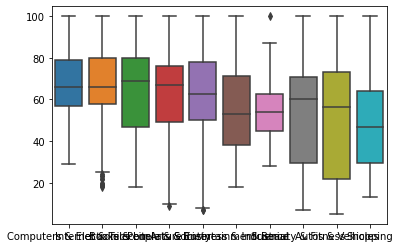

<Figure size 3600x720 with 0 Axes>

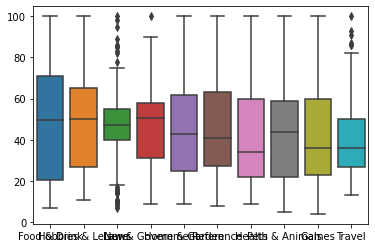

<Figure size 3600x720 with 0 Axes>

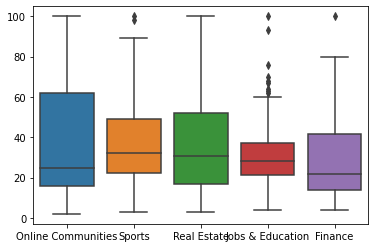

<Figure size 3600x720 with 0 Axes>

In [16]:
sns.boxplot(data=df[s1])
plt.figure(figsize=(50, 10))
plt.show()
sns.boxplot(data=df[s2])
plt.figure(figsize=(50, 10))
plt.show()
sns.boxplot(data=df[s3])
plt.figure(figsize=(50, 10))
plt.show()

# 5. Statistical Summary for the data

In [17]:
df.describe()

Arts & Entertainment  Autos & Vehicles  Beauty & Fitness  \
count            214.000000        214.000000        214.000000   
mean              59.191589         49.976636         51.845794   
std               24.216274         28.525492         24.867906   
min                7.000000          5.000000          7.000000   
25%               50.000000         22.000000         29.250000   
50%               62.500000         56.500000         60.000000   
75%               78.000000         73.000000         71.000000   
max              100.000000        100.000000        100.000000   

       Books & Literature  Business & Industrial  Computers & Electronics  \
count          214.000000             214.000000               214.000000   
mean            62.747664              54.191589                67.406542   
std             20.190452              21.095484                15.386054   
min             18.000000              18.000000                29.000000   
25%             47.000000              38.000000                57.000000   
50%             69.000000              53.000000                66.000000   
75%             80.000000              71.500000                79.000000   
max            100.000000             100.000000               100.000000   

         Finance  Food & Drink       Games      Health  Hobbies & Leisure  \
count  214.00000    214.000000  214.000000  214.000000         214.000000   
mean    27.61215     47.771028   40.841121   41.453271          47.060748   
std     18.78927     27.237590   24.253803   23.679693          22.092445   
min      4.00000      7.000000    4.000000    9.000000          11.000000   
25%     14.00000     20.250000   23.000000   22.000000          27.000000   
50%     22.00000     49.500000   36.000000   34.000000          50.000000   
75%     41.75000     71.000000   59.750000   60.000000          65.000000   
max    100.00000    100.000000  100.000000  100.000000         100.000000   

       Home & Garden  Internet & Telecom  Jobs & Education  Law & Government  \
count      214.00000          214.000000        214.000000        214.000000   
mean        44.64486           65.228972         30.294393         45.168224   
std         23.14346           19.432293         15.442222         17.253964   
min          9.00000           18.000000          4.000000          9.000000   
25%         25.00000           58.000000         21.250000         31.000000   
50%         43.00000           66.000000         28.000000         50.500000   
75%         61.75000           80.000000         37.000000         58.000000   
max        100.00000          100.000000        100.000000        100.000000   

             News  Online Communities  People & Society  Pets & Animals  \
count  214.000000           214.00000        214.000000      214.000000   
mean    46.794393            36.82243         60.841121       41.135514   
std     16.556200            27.08041         22.174362       20.163076   
min      7.000000             2.00000          9.000000        5.000000   
25%     40.000000            16.00000         49.250000       22.000000   
50%     47.000000            25.00000         67.000000       44.000000   
75%     54.750000            62.00000         76.000000       59.000000   
max    100.000000           100.00000        100.000000      100.000000   

       Real Estate   Reference     Science    Shopping      Sports      Travel  
count   214.000000  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     35.200935   44.560748   54.126168   48.542056   35.579439   40.588785  
std      22.615417   22.916946   12.992521   22.468666   21.522142   18.491187  
min       3.000000    8.000000   28.000000   13.000000    3.000000   13.000000  
25%      17.000000   27.250000   45.000000   29.250000   22.250000   27.000000  
50%      30.500000   41.000000   54.000000   47.000000   32.000000   36.000000  
75%      52.000000   63.000000   62.750000   64.000

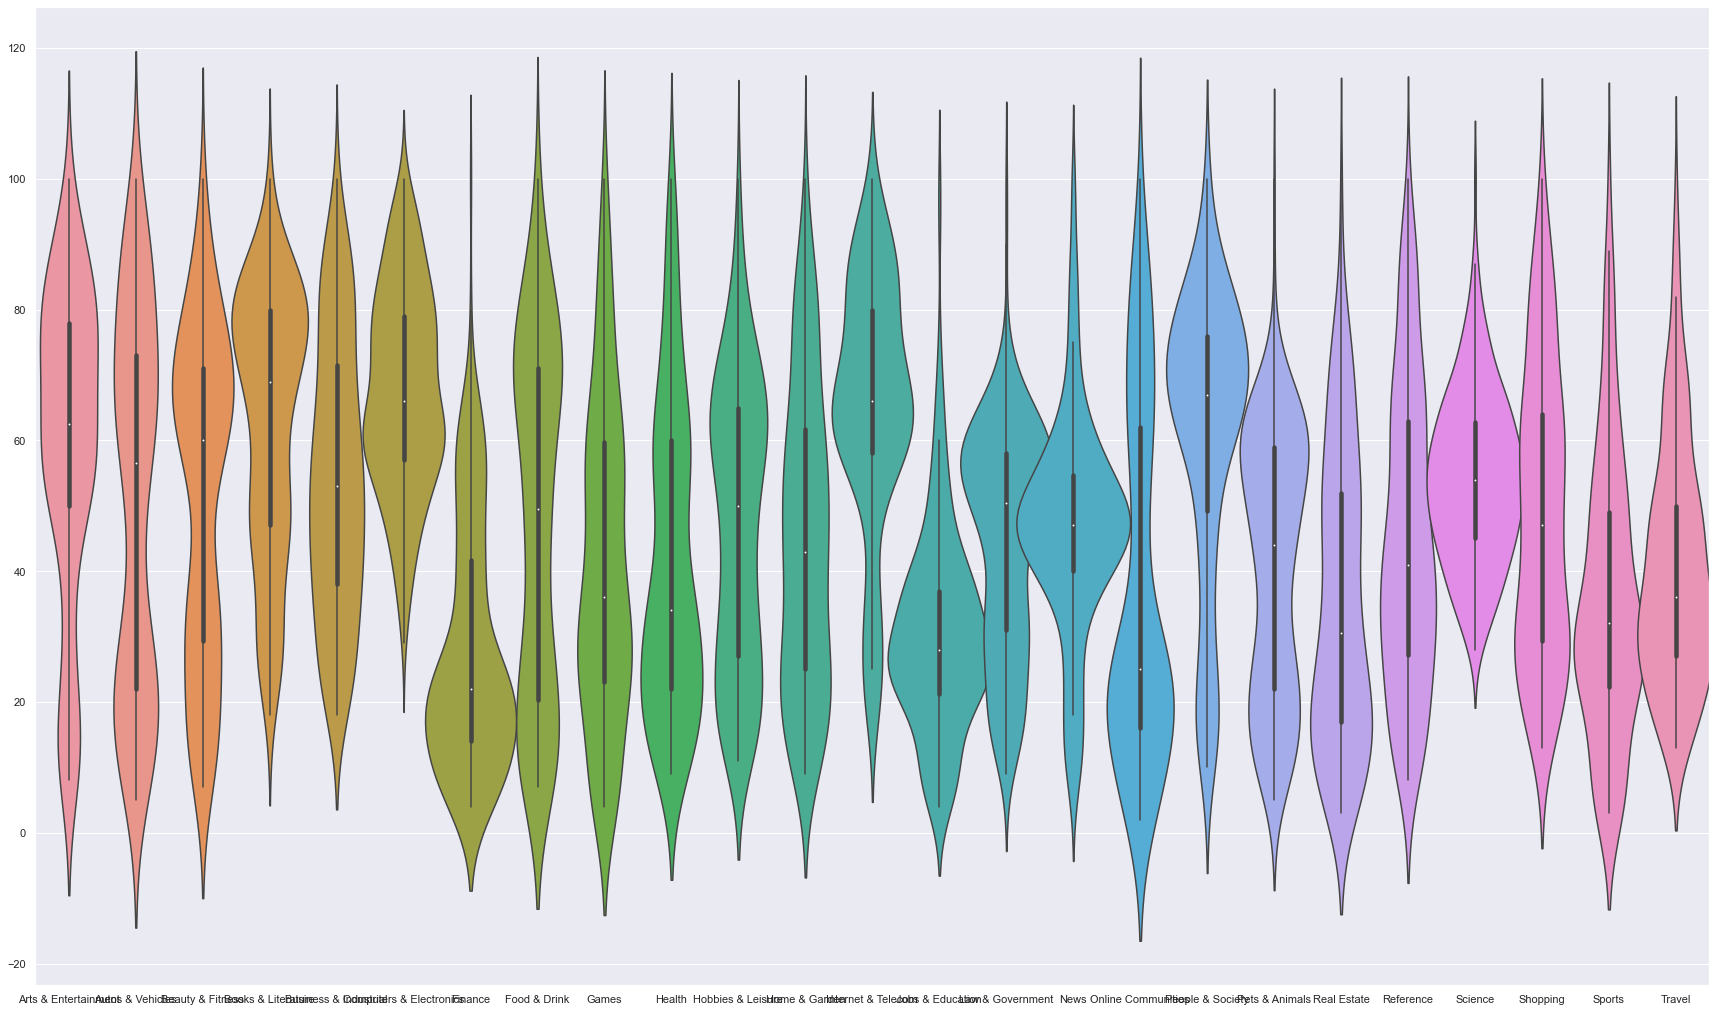

In [56]:

sns.violinplot(x=None, y=None, hue=None, data=df, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=1.7, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None)
sns.set(rc={'figure.figsize':(30,18)})

# 6. Correlation

In [18]:
df.corr()

Arts & Entertainment  Autos & Vehicles  \
Arts & Entertainment                 1.000000          0.758120   
Autos & Vehicles                     0.758120          1.000000   
Beauty & Fitness                     0.722921          0.891854   
Books & Literature                   0.738013          0.848690   
Business & Industrial                0.524907          0.741574   
Computers & Electronics              0.628842          0.139275   
Finance                              0.364468          0.594715   
Food & Drink                         0.621840          0.844267   
Games                                0.845717          0.446045   
Health                               0.401251          0.674652   
Hobbies & Leisure                    0.659102          0.837209   
Home & Garden                        0.513510          0.756562   
Internet & Telecom                   0.935147          0.703639   
Jobs & Education                     0.573544          0.367601   
Law & Government                     0.774835          0.785851   
News                                 0.781499          0.479947   
Online Communities                   0.827629          0.761378   
People & Society                     0.927666          0.788988   
Pets & Animals                       0.700757          0.888288   
Real Estate                          0.458062          0.732983   
Reference                            0.457409          0.693189   
Science                              0.413464          0.577650   
Shopping                             0.504317          0.763223   
Sports                               0.454725          0.589513   
Travel                               0.499470          0.717883   

                         Beauty & Fitness  Books & Literature  \
Arts & Entertainment             0.722921            0.738013   
Autos & Vehicles                 0.891854            0.848690   
Beauty & Fitness                 1.000000            0.945464   
Books & Literature               0.945464            1.000000   
Business & Industrial            0.928579            0.920734   
Computers & Electronics          0.135383            0.211459   
Finance                          0.816296            0.809052   
Food & Drink                     0.957287            0.933416   
Games                            0.337480            0.318512   
Health                           0.890478            0.870236   
Hobbies & Leisure                0.936194            0.909433   
Home & Garden                    0.932967            0.902812   
Internet & Telecom               0.620776            0.651316   
Jobs & Education                 0.469754            0.379879   
Law & Government                 0.887601            0.887567   
News                             0.596267            0.648837   
Online Communities               0.547877            0.528446   
People & Society                 0.856857            0.850309   
Pets & Animals                   0.947841            0.936361   
Real Estate                      0.903906            0.858551   
Reference                        0.891781            0.900152   
Science                          0.764087            0.843573   
Shopping                         0.930230            0.896389   
Sports                           0.807467            0.770206   
Travel                           0.872716            0.799871   

                         Business & Industrial  Computers & Electronics  \
Arts & Entertainment                  0.524907                 0.628842   
Autos & Vehicles                      0.741574                 0.139275   
Beauty & Fitness                      0.928579                 0.135383   
Books & Literature                    0.920734                 0.211459   
Business & Industrial                 1.000000                 0.019590   
Computers & Electronics               0.019590                 1.000000   
Finance                               0.918940                -0.1

In [16]:
corr_matrix=df.corr(method='pearson')
  
corr_matrix.style.background_gradient(cmap='coolwarm')

#dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
#plt.show()

In [20]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
for index, value in sol.items():
    print(index,'        correlation is         ', value)

('Home & Garden', 'Shopping')         correlation is          0.9856142433032827
('Health', 'Reference')         correlation is          0.9823657665006492
('Real Estate', 'Shopping')         correlation is          0.9811079149161619
('Business & Industrial', 'Home & Garden')         correlation is          0.9802692000543354
('Business & Industrial', 'Health')         correlation is          0.975024154123002
('Business & Industrial', 'Reference')         correlation is          0.9747063241479733
('Home & Garden', 'Real Estate')         correlation is          0.9734875097852604
('Business & Industrial', 'Shopping')         correlation is          0.9714287069149091
('Health', 'Home & Garden')         correlation is          0.967421092086197
('Health', 'Shopping')         correlation is          0.9585141242441202
('Beauty & Fitness', 'Food & Drink')         correlation is          0.9572870386475957
('Home & Garden', 'Reference')         correlation is          0.9551760564919545


# 7. Visualizing Trends

## 7.1.Highest correlated

###  7.1.1. Home & Garden and Shopping

<AxesSubplot:title={'center':'Stationary time series'}>

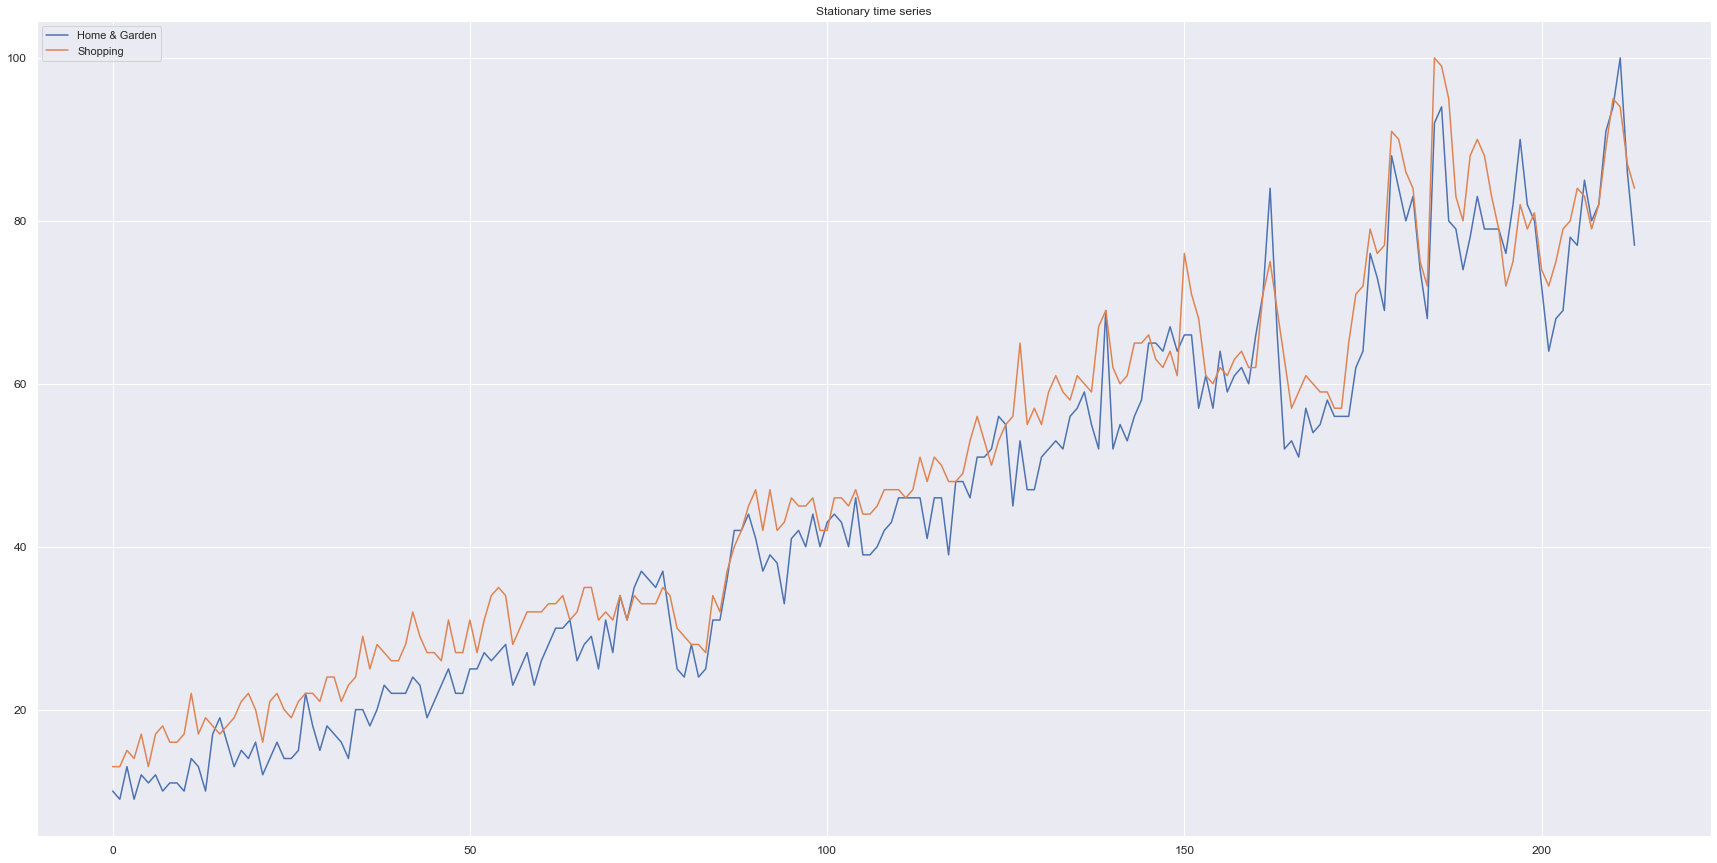

In [18]:
df[['Home & Garden', 'Shopping']].plot(kind='line', title="Stationary time series", figsize=(30,15), fontsize=12, legend=True)


### 7.1.2. Health and Reference

<AxesSubplot:title={'center':'Stationary time series'}>

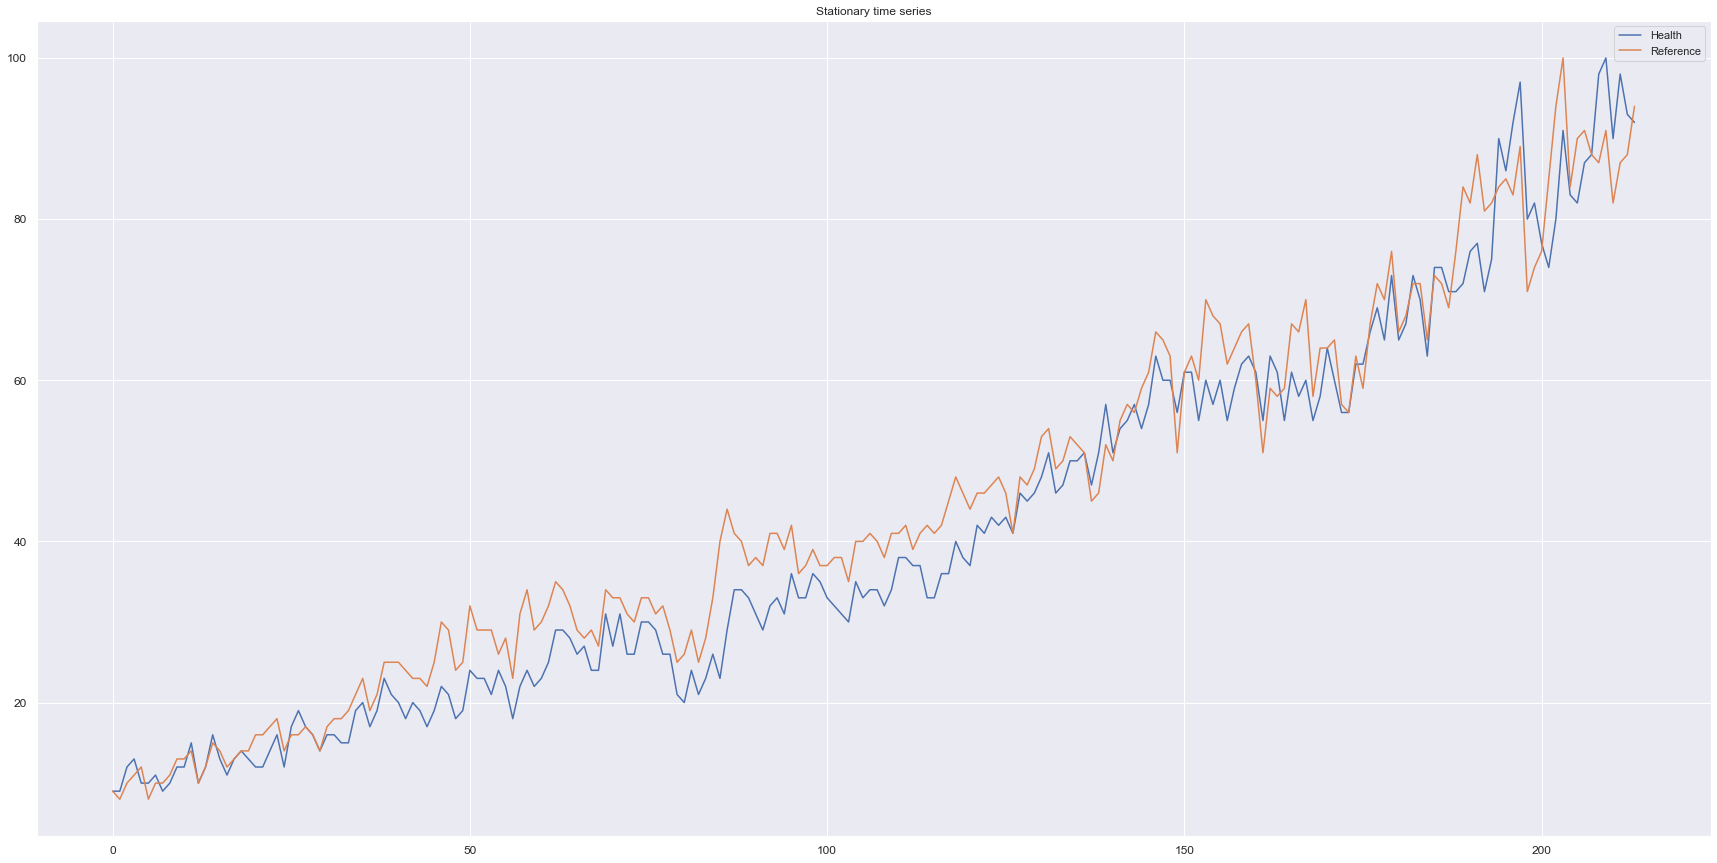

In [23]:
df[['Health', 'Reference']].plot(kind='line', title="Stationary time series", figsize=(30,15), fontsize=12, legend=True)


## 7.2.Lowest correlated

### 7.2.1. Computers & Electronics and Food & Drink

<AxesSubplot:title={'center':'Stationary time series'}>

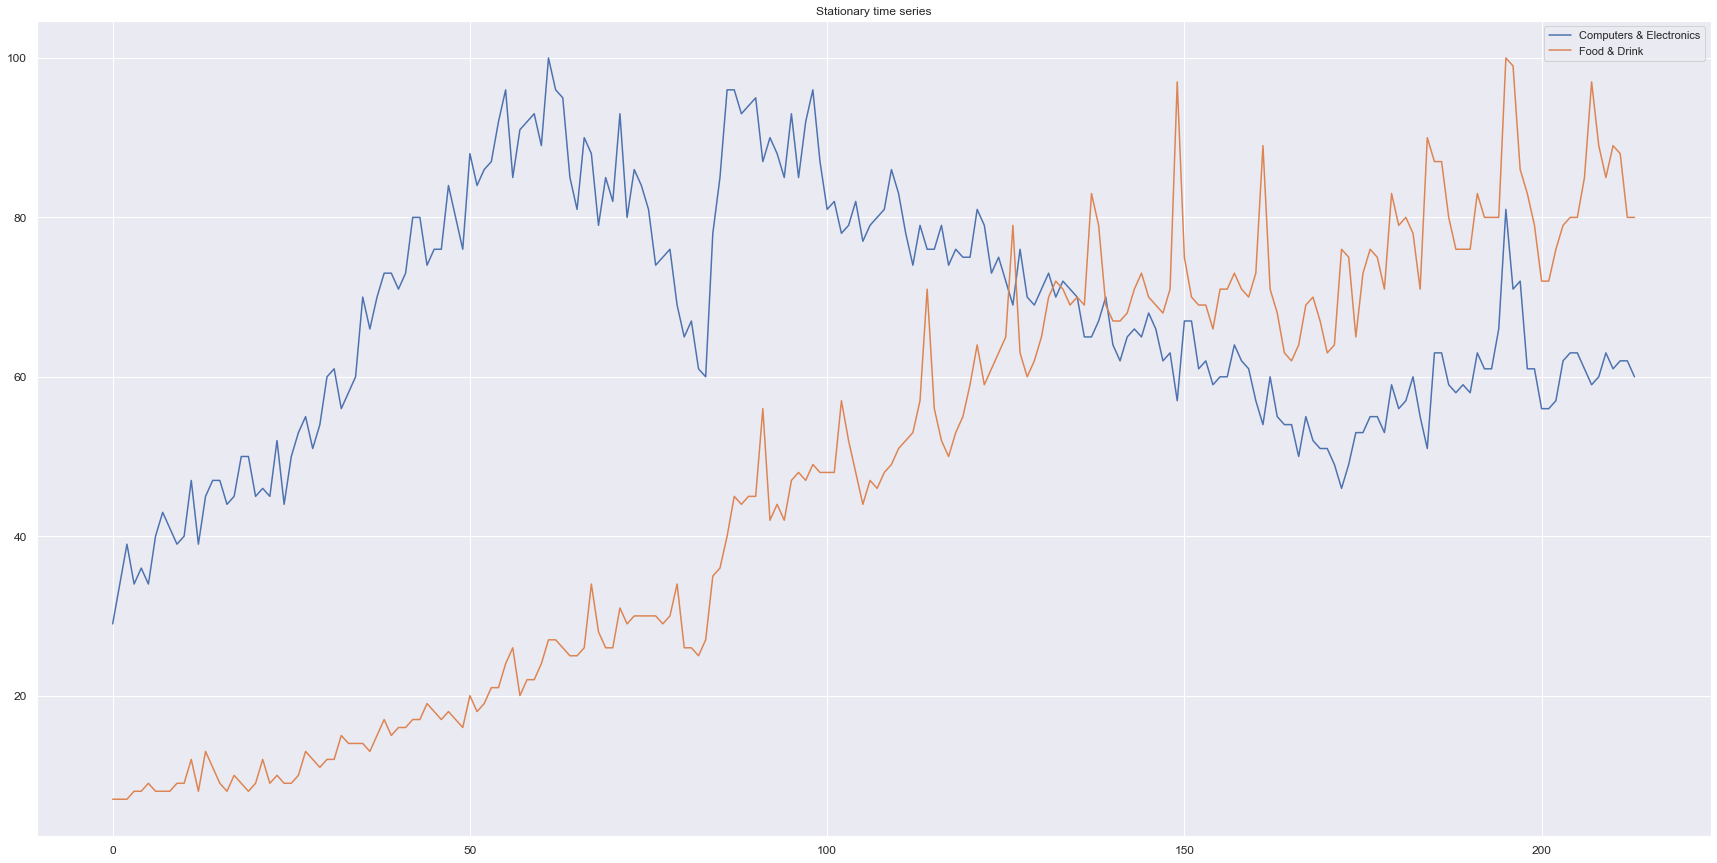

In [24]:
df[['Computers & Electronics', 'Food & Drink']].plot(kind='line', title="Stationary time series", figsize=(30,15), fontsize=12, legend=True)

### 7.2.2. Games and Science

<AxesSubplot:title={'center':'Stationary time series'}>

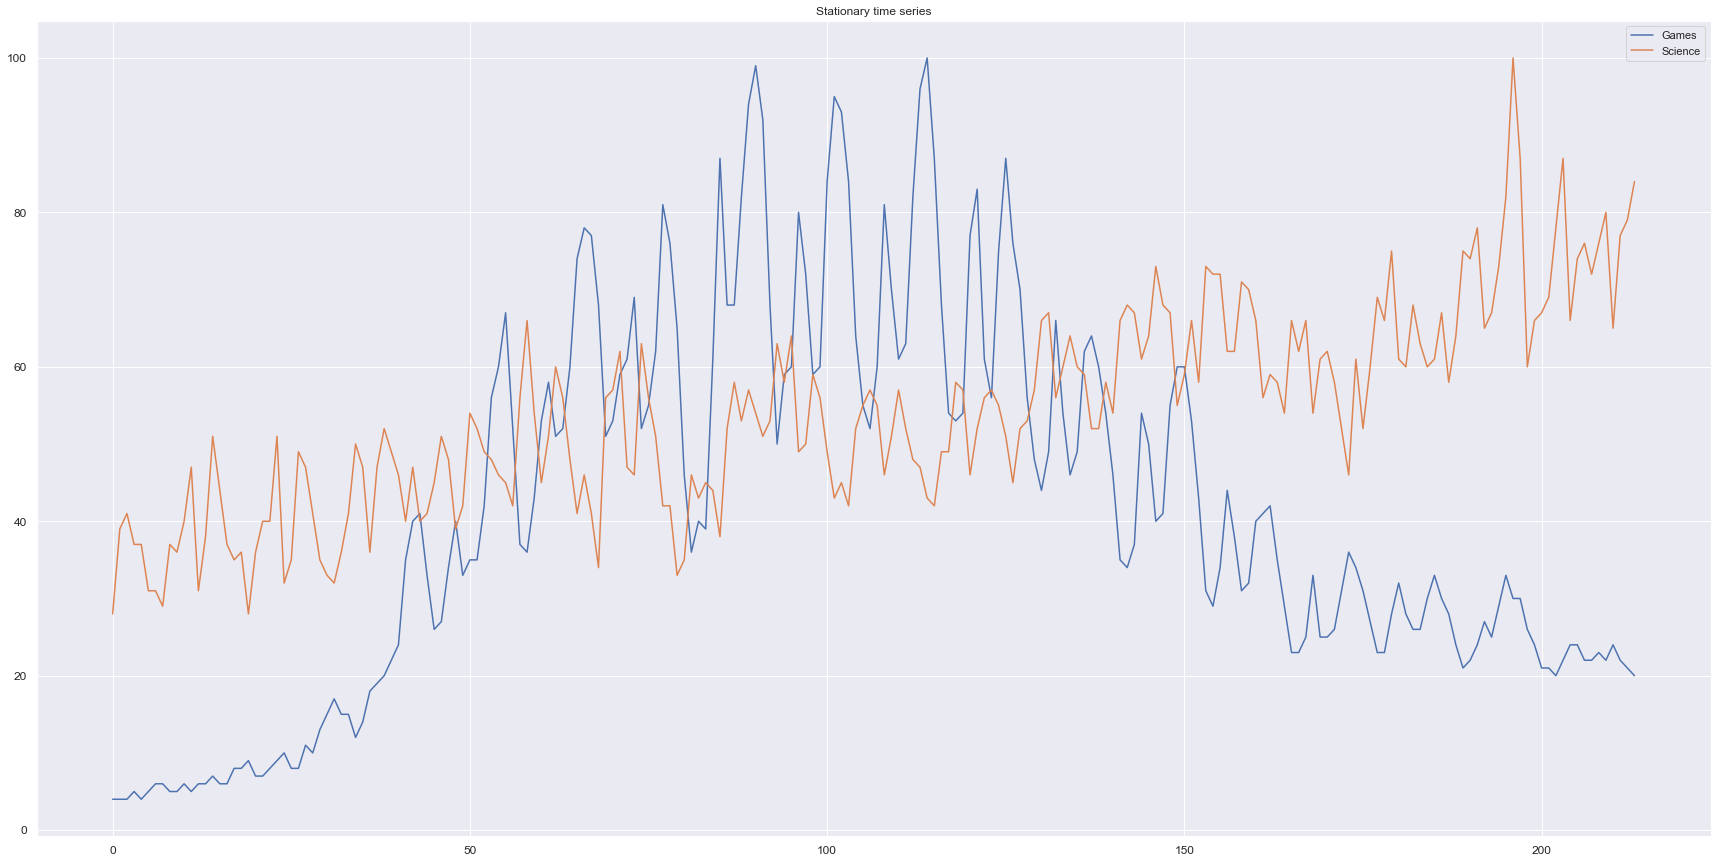

In [25]:
df[['Games', 'Science']].plot(kind='line', title="Stationary time series", figsize=(30,15), fontsize=12, legend=True)


# 8-Hypothesis Testing

## 8.1.Checking for Autocorrelation

In [19]:
#autocorrelation test(using DW)
#H0: no autocorrelation
#H1: Autocorrelation 
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols

In [27]:
#perform Durbin-Watson test
#
for col in df.columns.to_list()[1:]:
    print(col)
    print(durbin_watson(df[col]))

Arts & Entertainment
0.006840145468846642
Autos & Vehicles
0.005959150573804885
Beauty & Fitness
0.006065484029303304
Books & Literature
0.006350292552447477
Business & Industrial
0.008099561838315712
Computers & Electronics
0.004834942210463226
Finance
0.03196046266734352
Food & Drink
0.009955367157344307
Games
0.03141951858794645
Health
0.0066732763097664665
Hobbies & Leisure
0.030823191886611905
Home & Garden
0.010696898398887211
Internet & Telecom
0.004028404693212562
Jobs & Education
0.17294723513396523
Law & Government
0.020949748603016762
News
0.01975202283181273
Online Communities
0.005849486069665117
People & Society
0.007804799728838958
Pets & Animals
0.01903229472867837
Real Estate
0.014052054347797032
Reference
0.006984031177579565
Science
0.018591067417510057
Shopping
0.00605603920325081
Sports
0.03643753179422238
Travel
0.020694243318977675


## 8.2.Checking for Stationarity

In [58]:
#Testing for Stationarity using Dicky-Fuller test
#H0=non-stationary
#H1=stationary
#p-value > 0.05: Fail to reject the null hypothesis (H0)
#p-value <= 0.05: Reject the null hypothesis (H0)
from statsmodels.tsa.stattools import adfuller
for col in df.columns.to_list()[1:]:
    X =df[col].values
    result = adfuller(X)
    print(col)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

Arts & Entertainment
ADF Statistic: -2.296748
p-value: 0.173019
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Autos & Vehicles
ADF Statistic: -1.697441
p-value: 0.432431
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575
Beauty & Fitness
ADF Statistic: -0.832516
p-value: 0.809384
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Books & Literature
ADF Statistic: -1.929601
p-value: 0.318266
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575
Business & Industrial
ADF Statistic: -0.279130
p-value: 0.928409
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575
Computers & Electronics
ADF Statistic: -2.245727
p-value: 0.190069
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Finance
ADF Statistic: -0.712716
p-value: 0.843428
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
Food & Drink
ADF Statistic: -0.690455
p-value: 0.849206
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
Games
ADF Statistic: -1.701121
p-value: 0.430535
Critical Values:
	1%: -3.464
	5%: 

## Dimentionality Reduction 

In [21]:
#dimentionality reduction
from sklearn.ensemble import RandomForestRegressor
df1=df.drop(['Science'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df2=pd.get_dummies(df1)
model.fit(df2,df.Science)

RandomForestRegressor(max_depth=10, random_state=1)

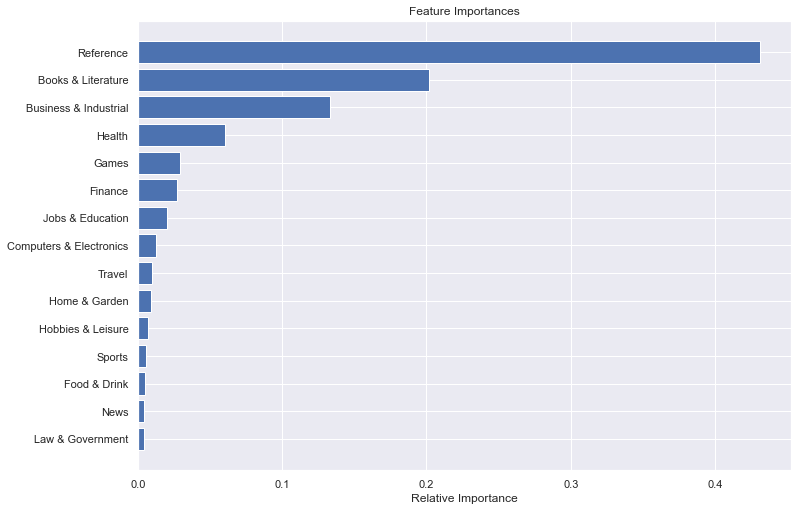

In [74]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## ACF and PACF plots

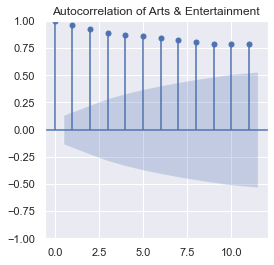

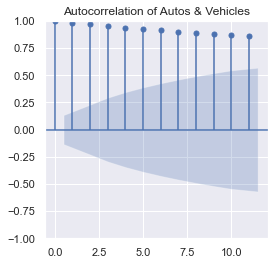

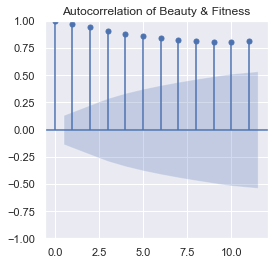

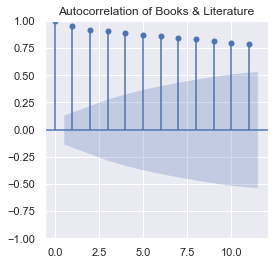

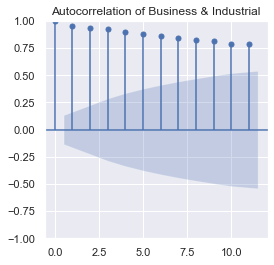

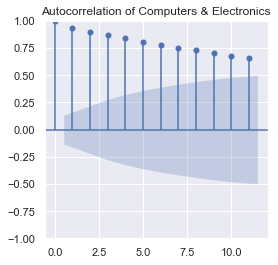

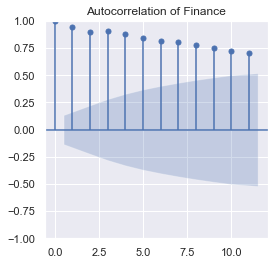

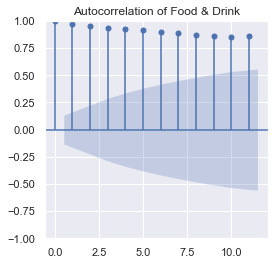

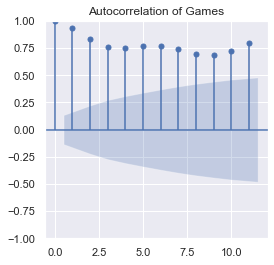

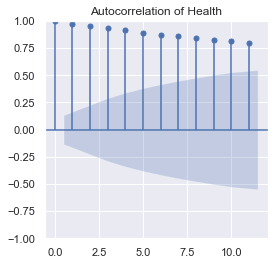

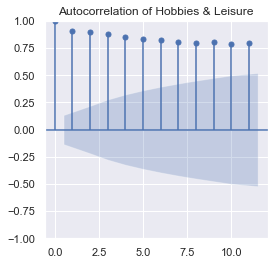

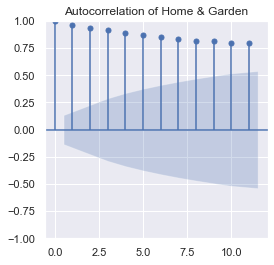

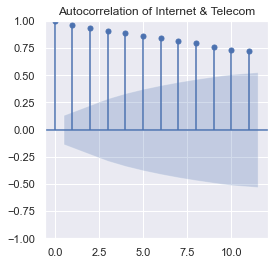

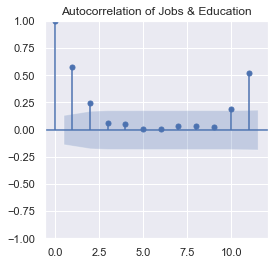

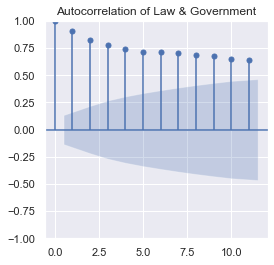

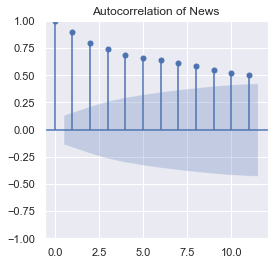

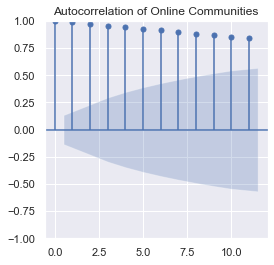

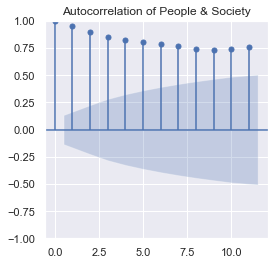

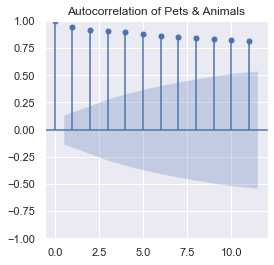

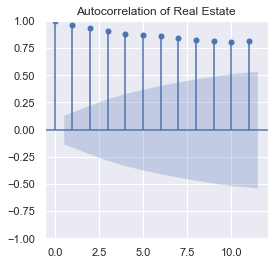

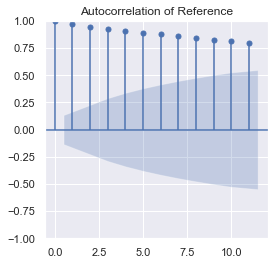

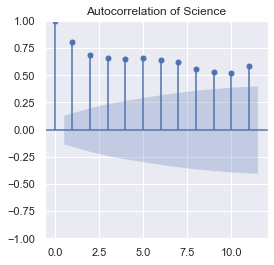

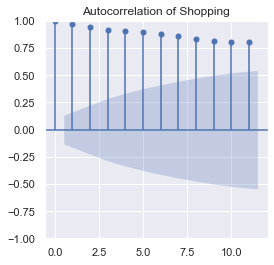

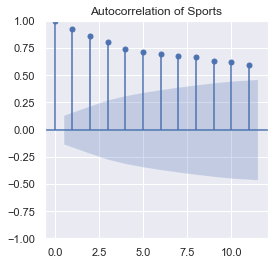

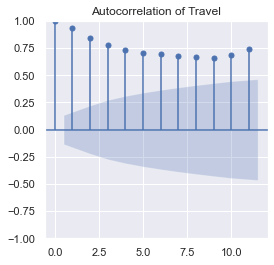

In [85]:
#Plot ACF
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
sns.set(rc={'figure.figsize':(4,4)})
lag='11'
cl=95
for col in df.columns.to_list()[1:]:
    plot_acf(df[col],lags=lag,alpha=round((100-cl)/100,2),use_vlines=True,adjusted=False, missing='none', title="Autocorrelation of " + col)
pyplot.show()

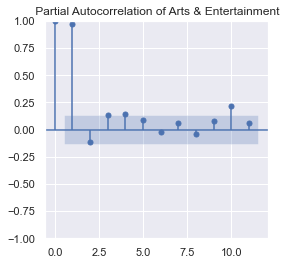

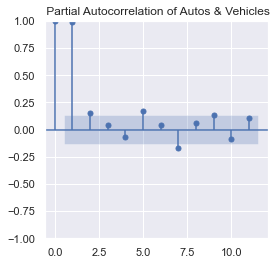

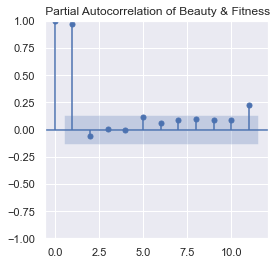

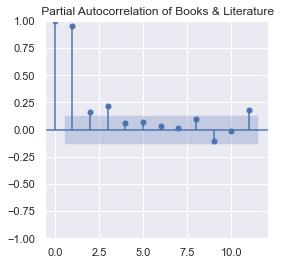

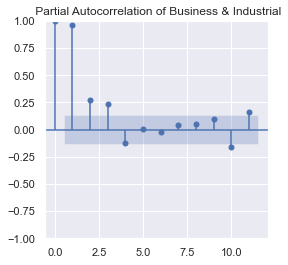

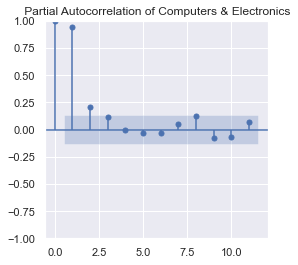

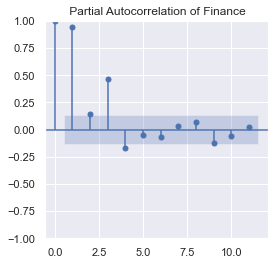

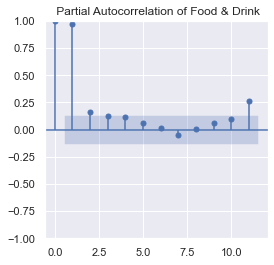

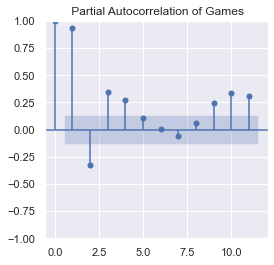

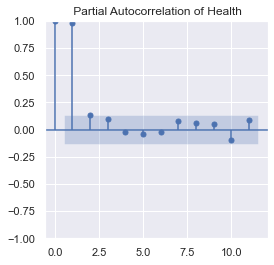

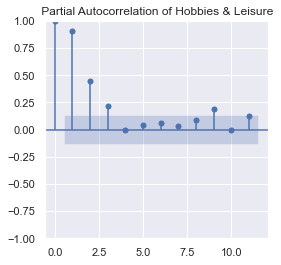

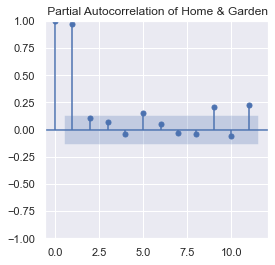

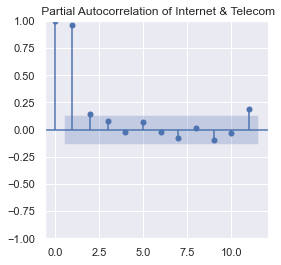

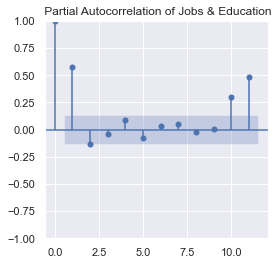

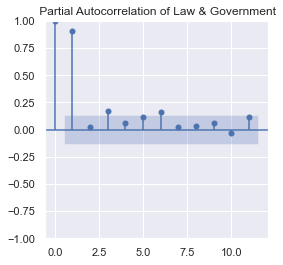

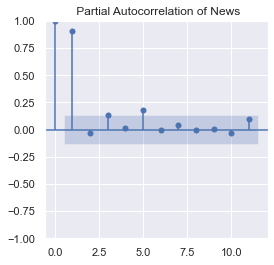

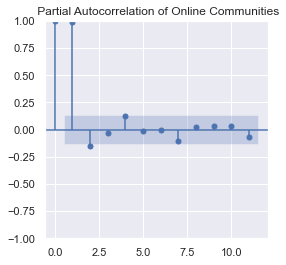

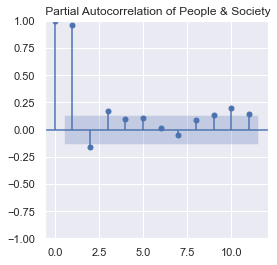

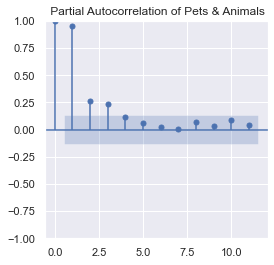

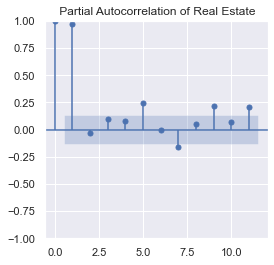

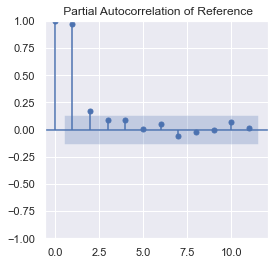

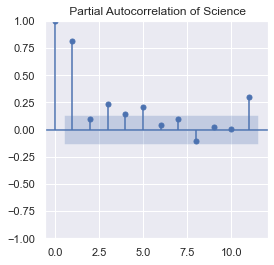

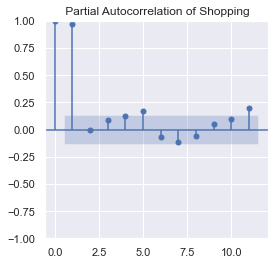

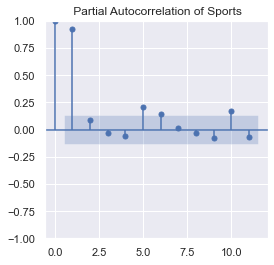

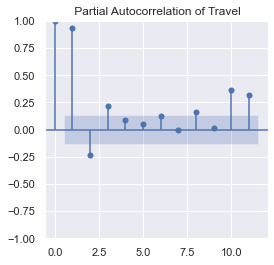

In [84]:
#Plot PACF
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
lag='11'
cl=95
for col in df.columns.to_list()[1:]:
    plot_pacf(df[col],lags=lag,alpha=round((100-cl)/100,2),use_vlines=True, title=' Partial Autocorrelation of '+col)
    pyplot.show()

## Seasonal Decomposition 

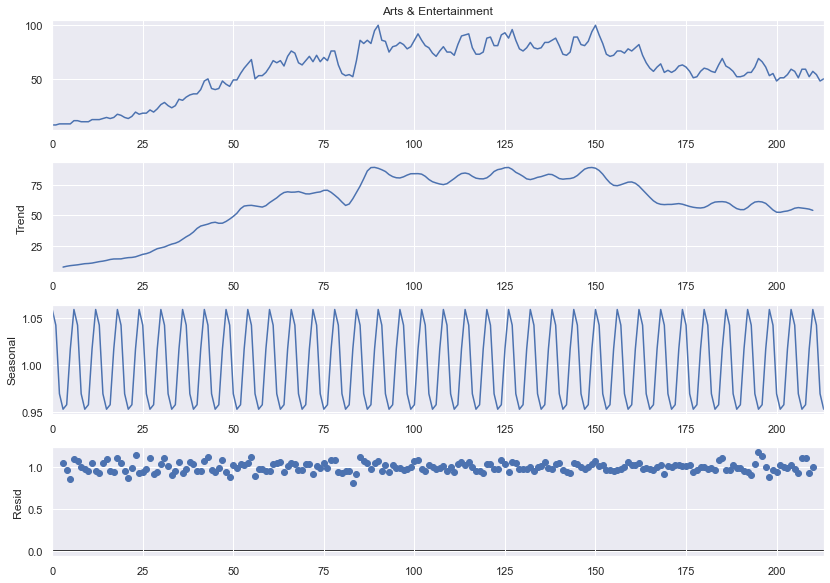

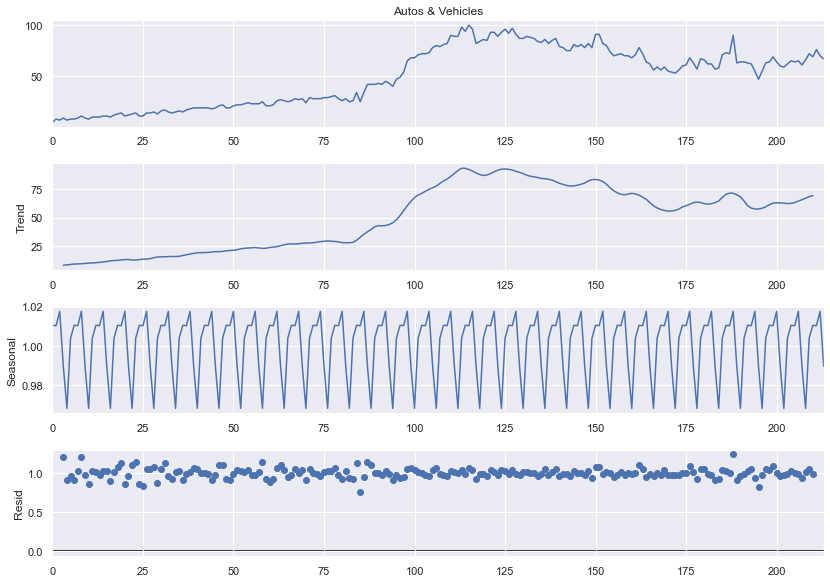

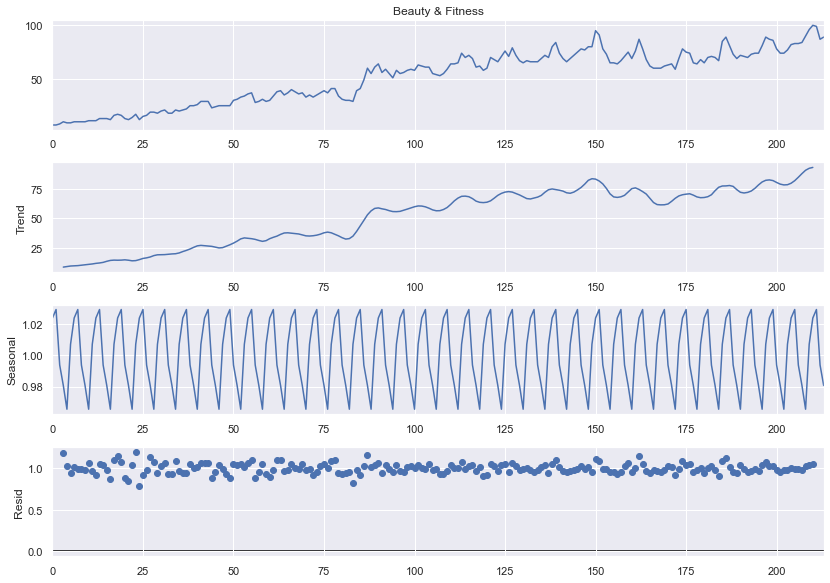

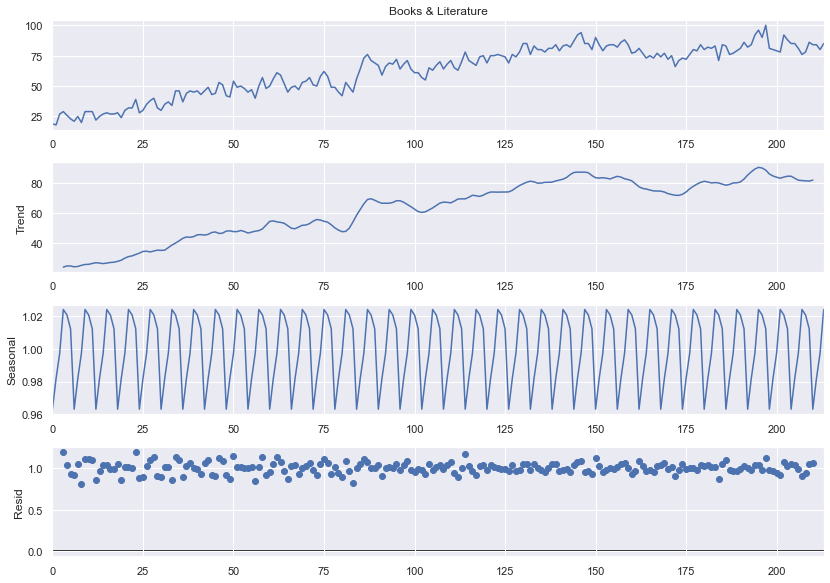

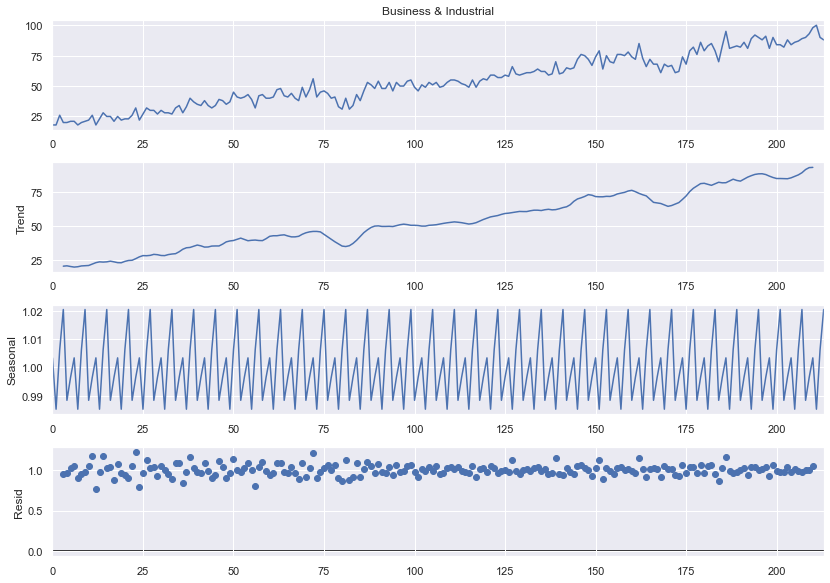

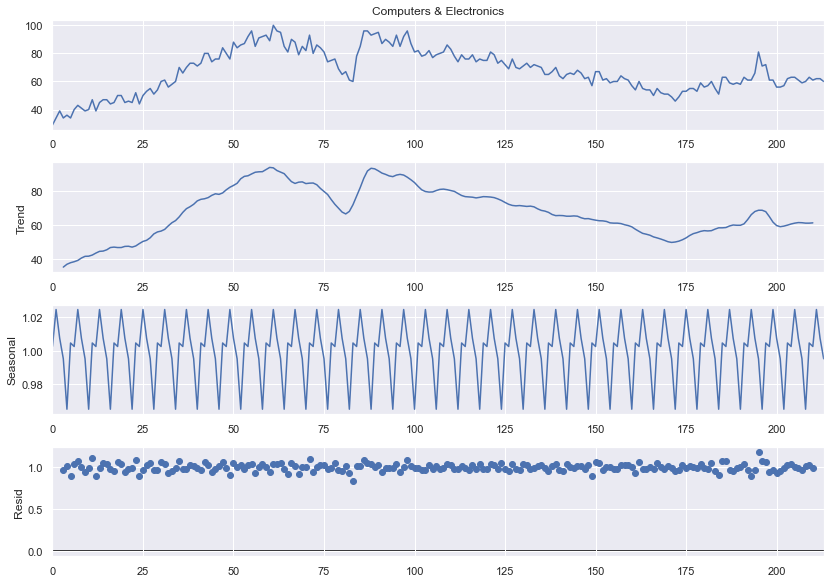

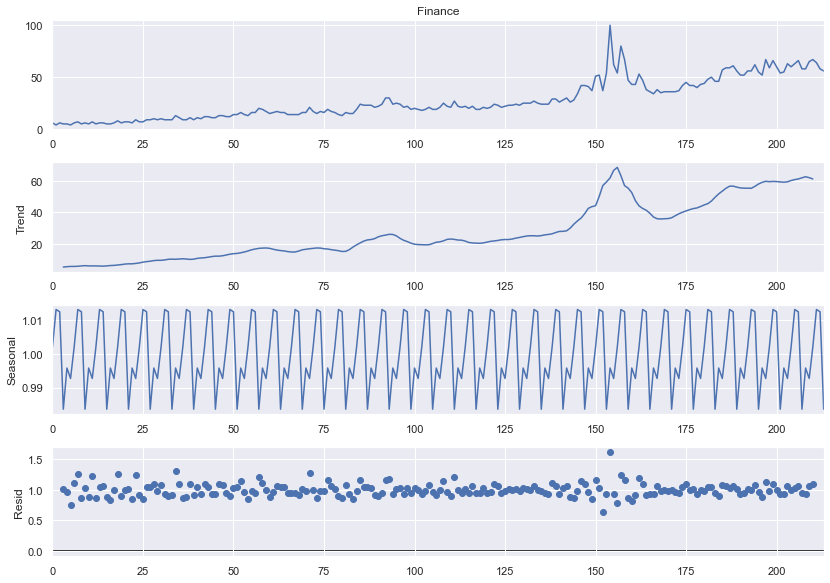

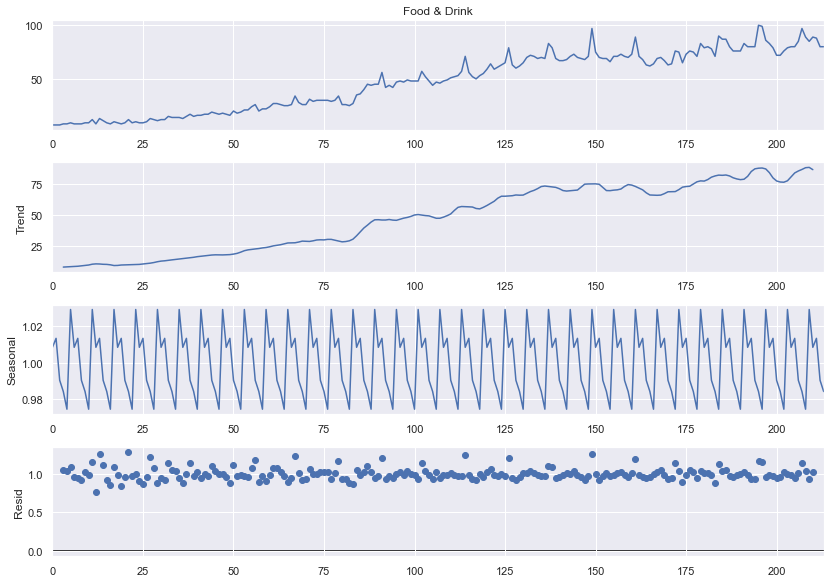

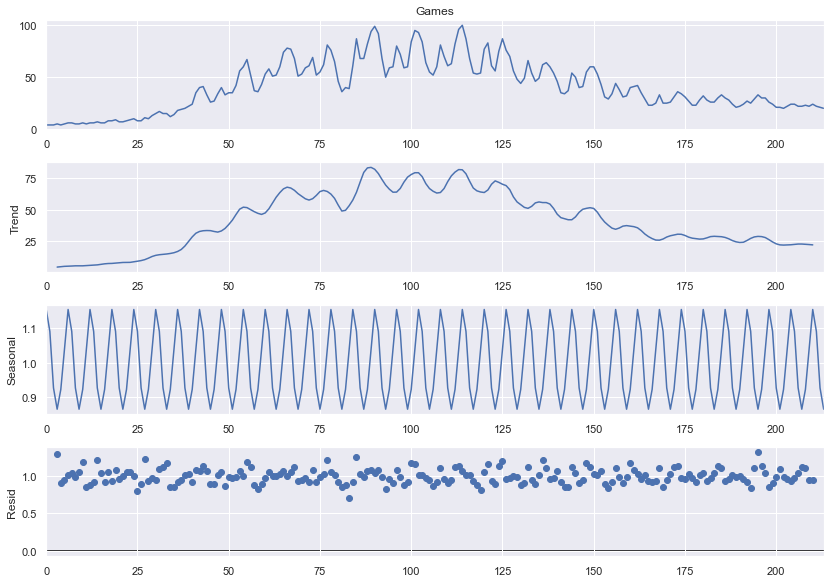

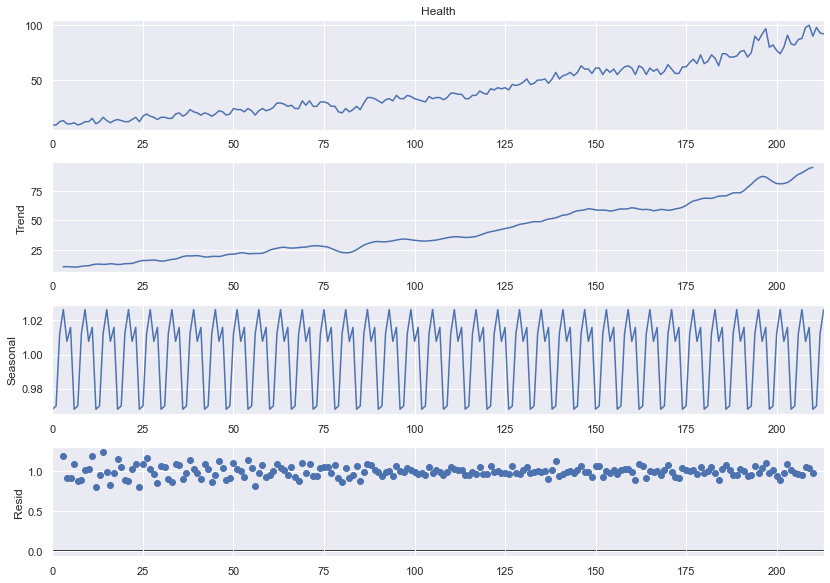

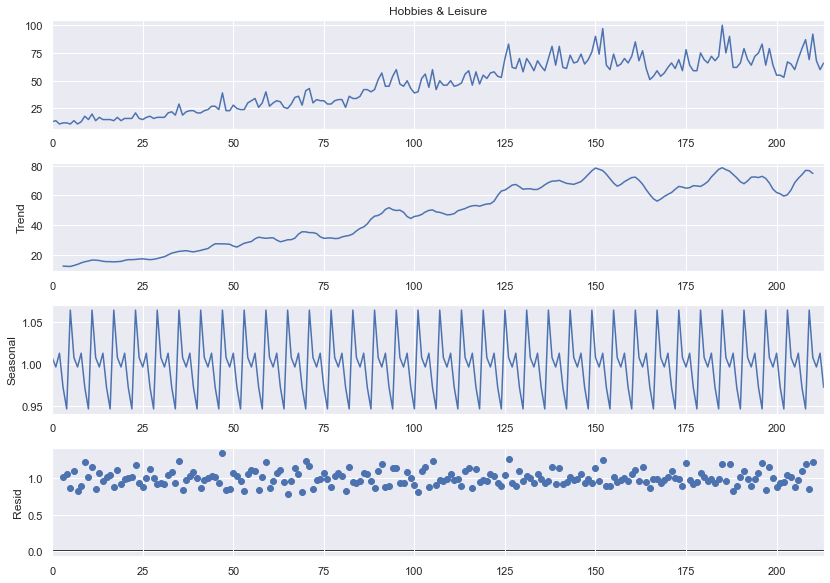

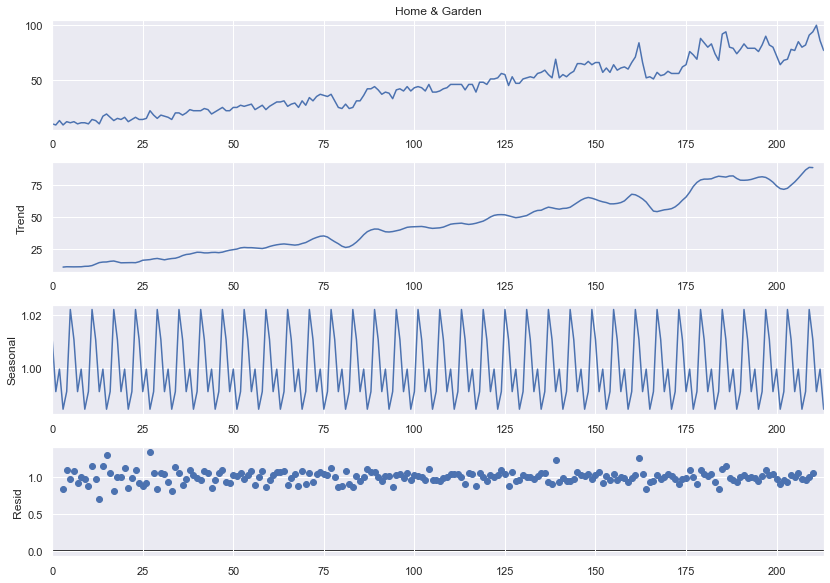

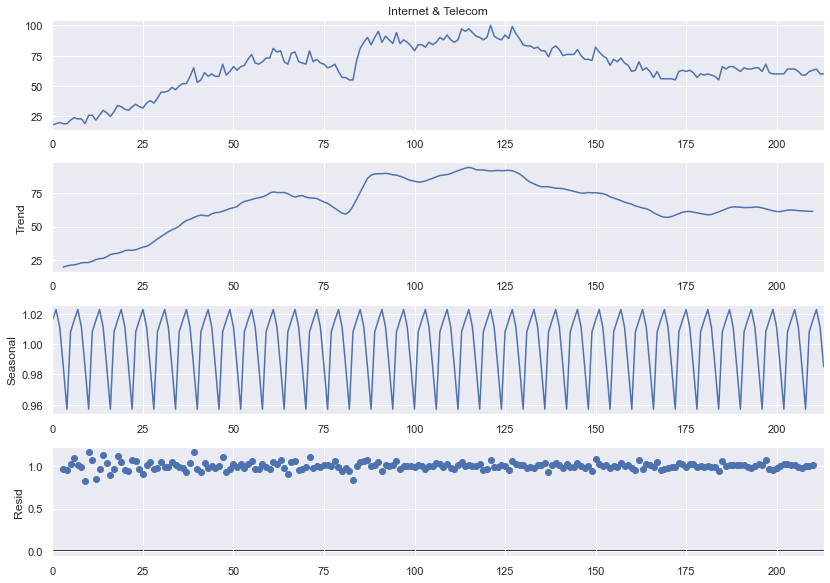

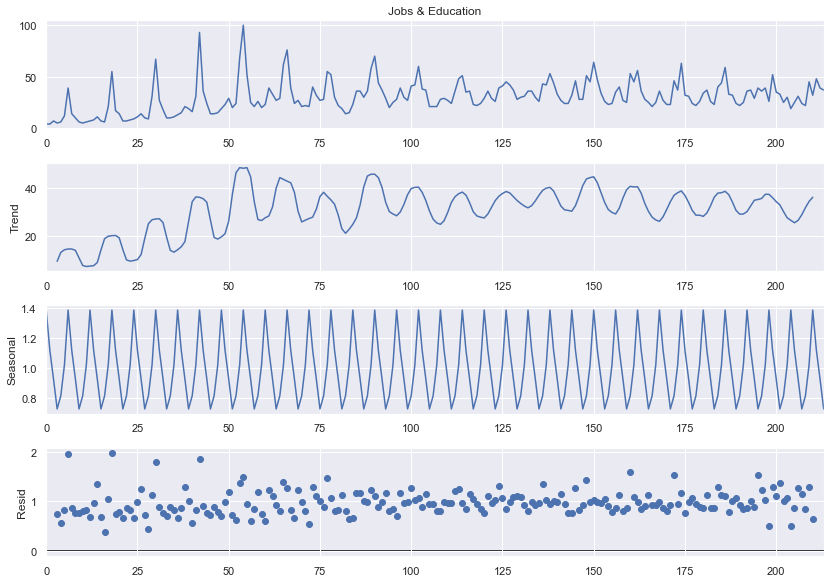

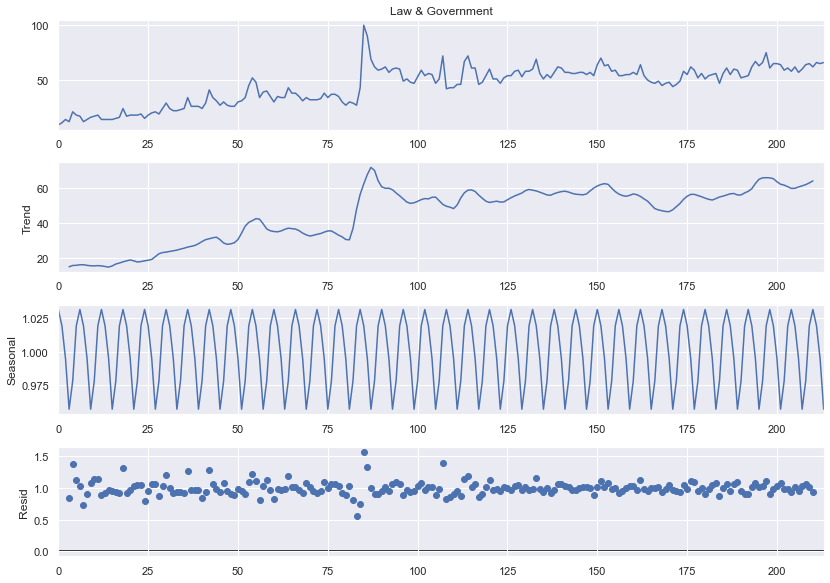

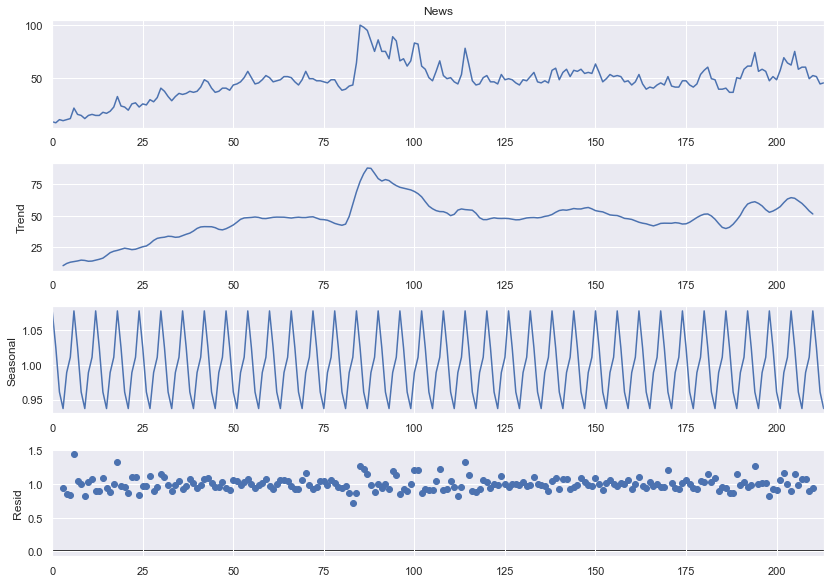

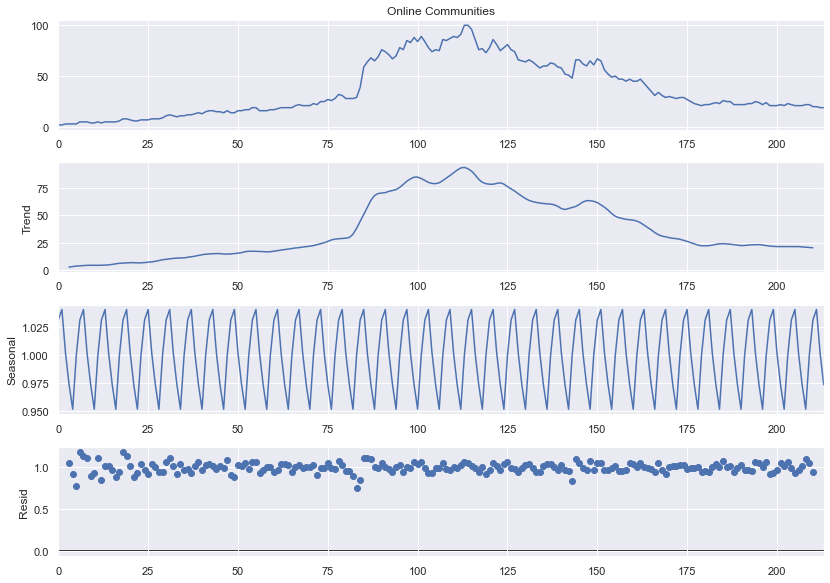

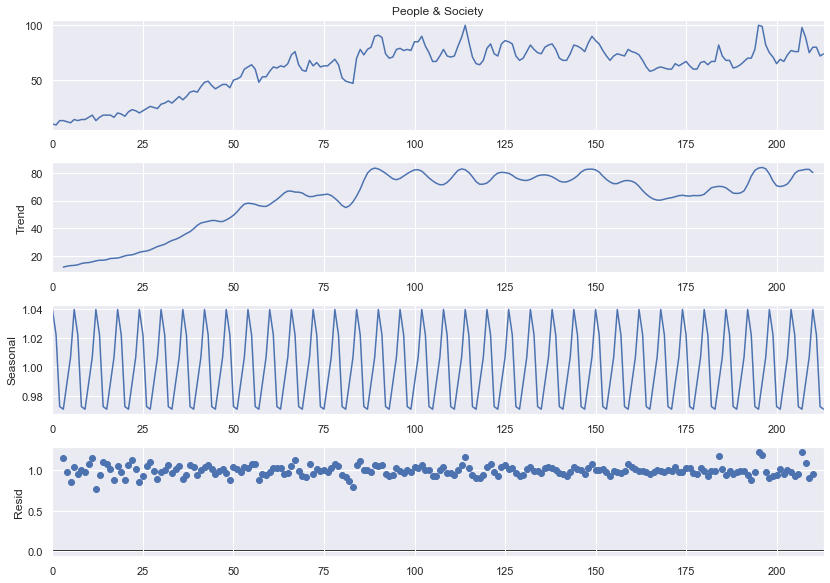

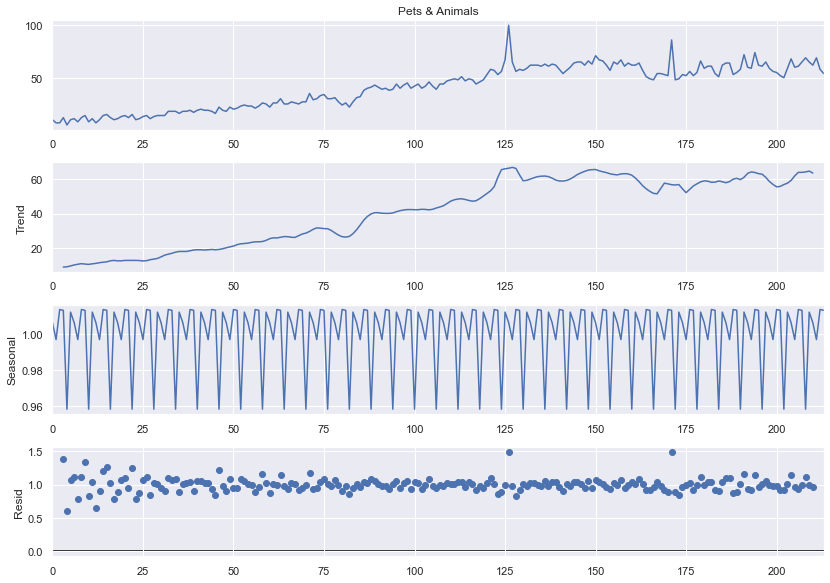

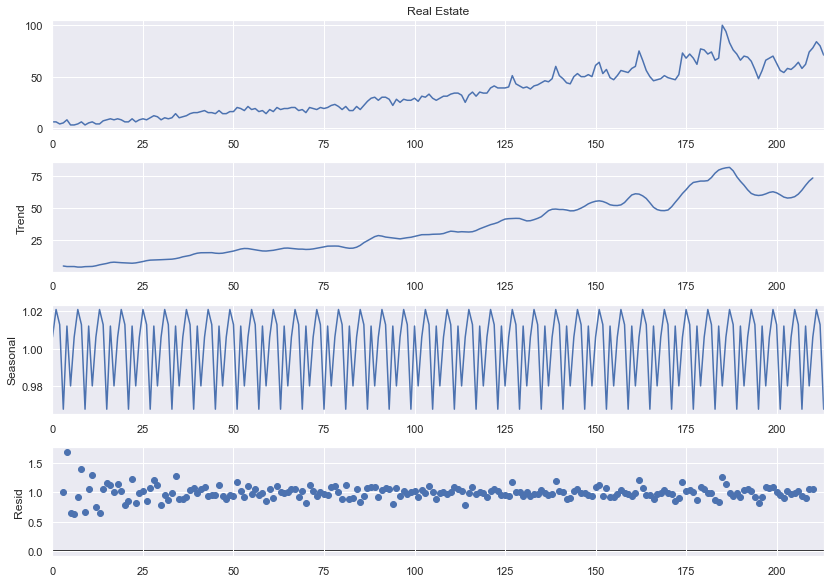

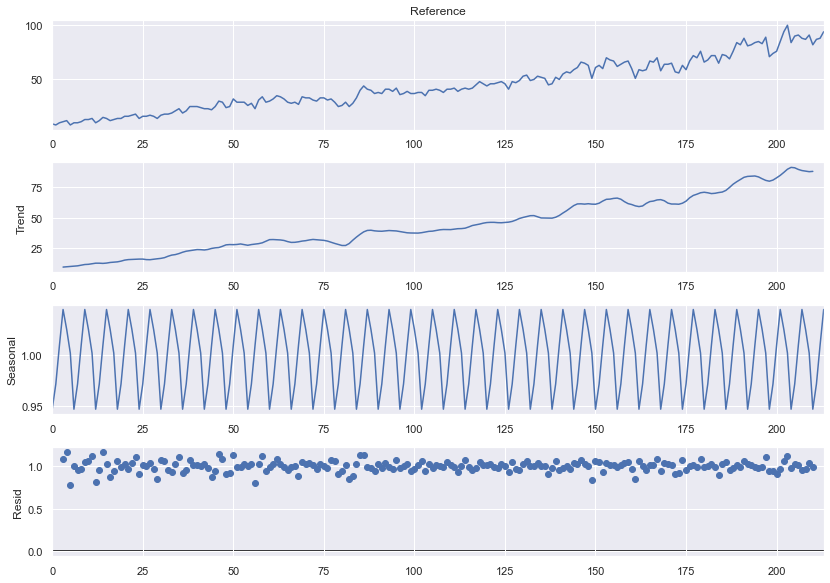

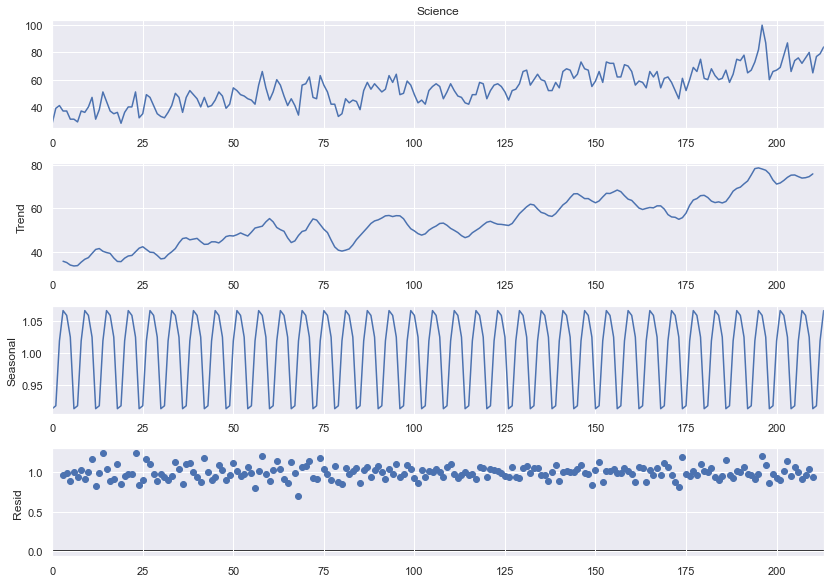

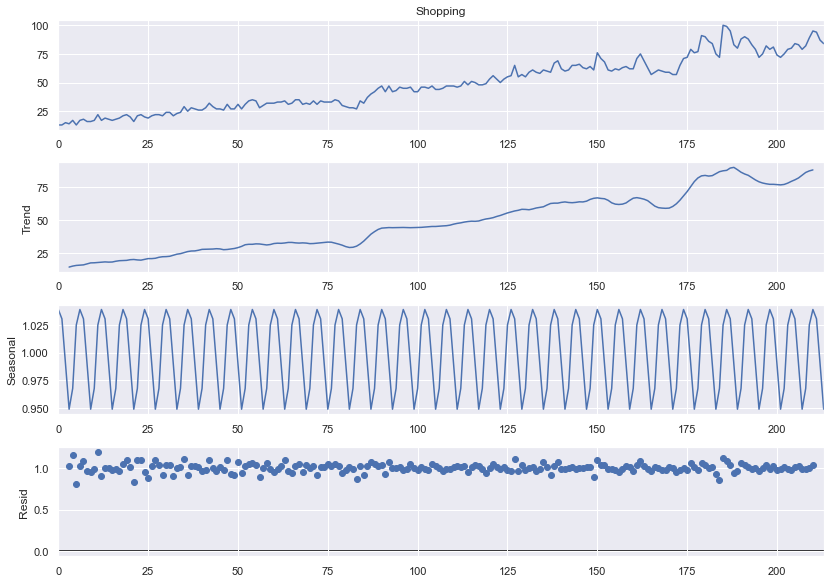

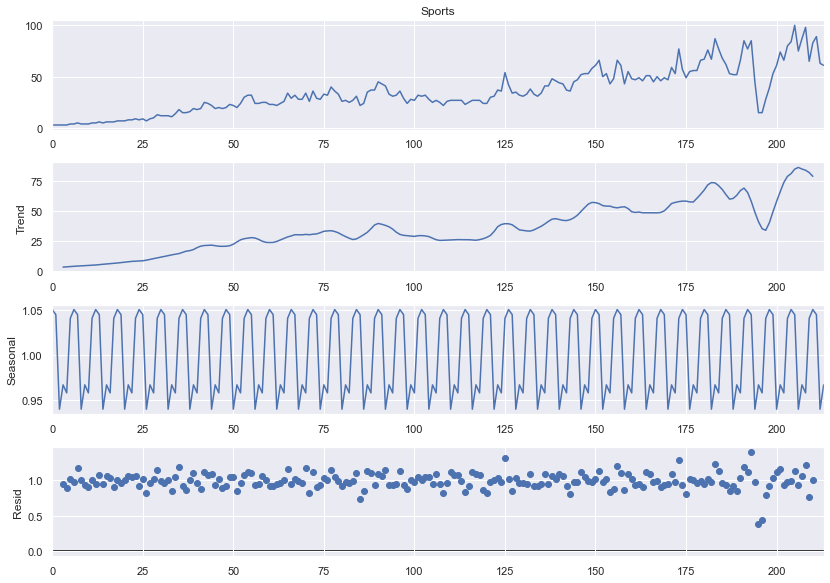

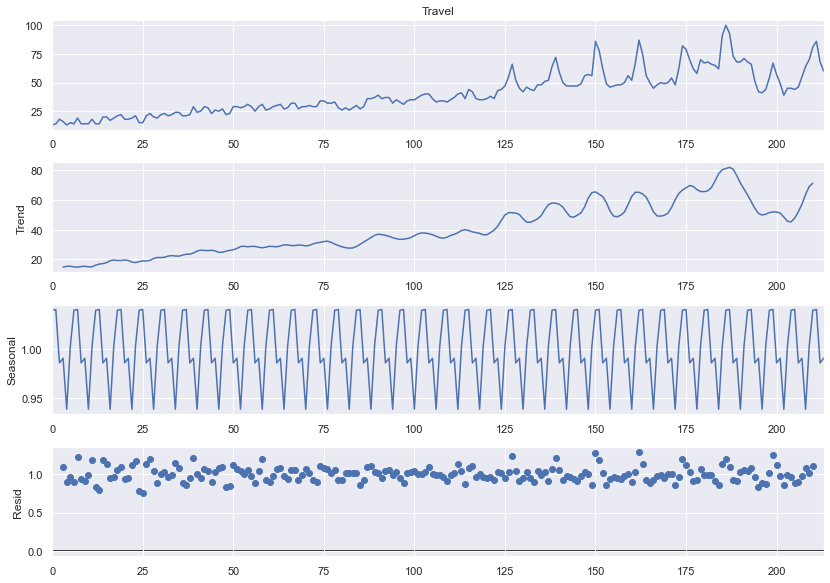

In [44]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(11.7,8.27)})
# df1=df['Arts & Entertainment']
for col in df.columns.to_list()[1:]:
#     print(col)
    df1=df[col]
    result = seasonal_decompose(df1, model='multiplicative', period=6)
    result.plot()
    pyplot.show()
    
    